# Task : Predict the GENDER of Abalone (a shell fish)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
raw1 = pd.read_csv('abalone.csv')

In [4]:
raw1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# to strip the white spaces in column names
raw1.columns = raw1.columns.str.strip()

In [6]:
raw1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### Initial Observations:

<ol>
<li>Total : 4177 entries</li>
<li>No missing values as per this stage</li>
<li>Categorical variable : Sex</li>
<li>Other parameters are mostly floating pt data except for 'Rings' column.</li>
</ol>

In [8]:
cols = list(raw1.columns)
del cols[0]
cols

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

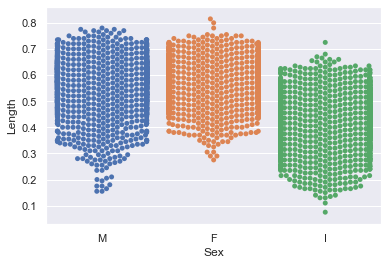

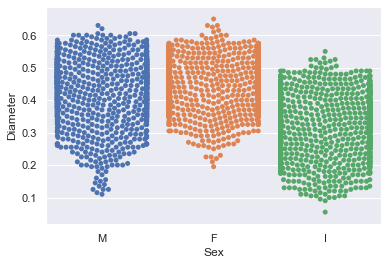

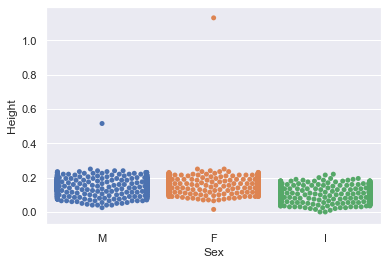

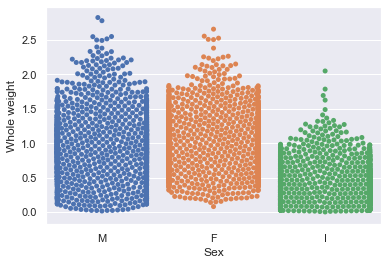

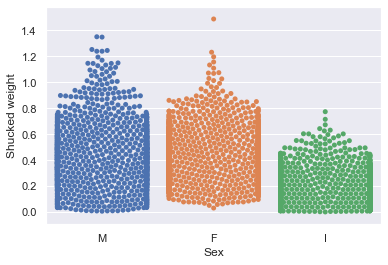

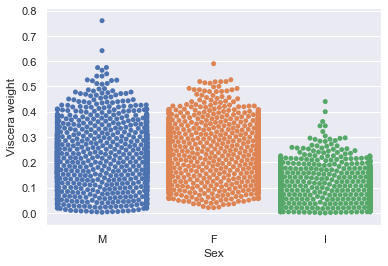

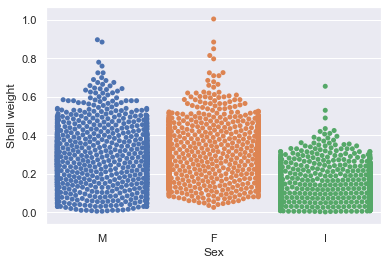

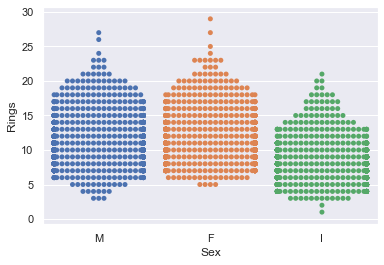

In [40]:
# Beeswarm plots for the different features

for i in cols:
    _= sns.swarmplot(x='Sex', y=i, data=raw1)
    plt.show()

**Thoughts:**

1. The swarm plots show that most of the features are identical in major proportions among Male, Female and Infant Abalones.
2. With such overlap of features we can expect a not so satisfactory accuracy for any number of classifiers we train.
3. In order to set a benchmark, lets fit a number of classifiers such as Logistic, Support Vector Machine, Decision Tree, Random Forest, hard Voting and AdaBoost on the training data.
4. Just to find what a neural network implementation could achieve, we would also fit a neural network.
5. To improve the classifier's accuracy, feature engineering would be tried.


### Next few steps to follow:

1. Split data for Train/Test
2. Scale the data 
3. Train and Test on Logistic, SVC, Decision Tree, RF, Voting, AdaBoost
4. Observe and comment on the accuracy of the predictions.
5. Also print the confusion matrix to understand where the classifier/s fail.

In [9]:
raw1.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [10]:
# splitting the dataset for train and test

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw1, test_size=0.3, random_state = 42)

> Checking whether the split gave a representative sampling

In [11]:
train_set['Sex'].value_counts()/len(train_set)

M    0.366062
F    0.318166
I    0.315771
Name: Sex, dtype: float64

In [12]:
test_set['Sex'].value_counts()/len(test_set)

M    0.365231
I    0.334131
F    0.300638
Name: Sex, dtype: float64

> create a pipeline to encode categorical variable and scale the data

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# prepare the training data
x_train = train_set.drop('Sex',axis = 1)
y_train = train_set[['Sex']]

pl = Pipeline([('std_scaler',StandardScaler())])
x = pl.fit_transform(x_train)

ord_enc = OrdinalEncoder()
y = ord_enc.fit_transform(y_train)

In [14]:
# prepare the testing data

x_test = test_set.drop('Sex',axis = 1)
y_test = test_set[['Sex']]

x_t = pl.fit_transform(x_test)
y_t = ord_enc.fit_transform(y_test)

In [15]:
print("shape of x train:",x.shape)
print("shape of y train:",y.shape)
print("shape of x test:",x_t.shape)
print("shape of y test:",y_t.shape)

shape of x train: (2923, 8)
shape of y train: (2923, 1)
shape of x test: (1254, 8)
shape of y test: (1254, 1)


In [16]:
ord_enc.categories_

[array(['F', 'I', 'M'], dtype=object)]

> Classifiers

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class = 'auto')

svm_clf = SVC(gamma='scale', random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 250, n_jobs = -1,random_state=42)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('svc',svm_clf),('tr',tree_clf),('rf',rnd_clf)], voting='hard')

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME.R', learning_rate=0.1)



In [18]:
# checking the accuracy of each classifier

from sklearn.metrics import confusion_matrix

for clf in (log_clf, svm_clf, tree_clf,rnd_clf,voting_clf,ada_clf):
    
    clf.fit(x,y.ravel())
    y_pred = clf.predict(x_t)
    print(clf.__class__.__name__,": ",accuracy_score(y_t.ravel(),y_pred))
    print("Conf_mat:") 
    print(confusion_matrix(y_t, y_pred))
    print("")

LogisticRegression :  0.5637958532695375
Conf_mat:
[[149  61 167]
 [ 31 345  43]
 [148  97 213]]

SVC :  0.562200956937799
Conf_mat:
[[125  50 202]
 [ 20 328  71]
 [125  81 252]]

DecisionTreeClassifier :  0.48086124401913877
Conf_mat:
[[142  53 182]
 [ 67 267  85]
 [181  83 194]]

RandomForestClassifier :  0.5406698564593302
Conf_mat:
[[153  42 182]
 [ 44 315  60]
 [177  71 210]]

VotingClassifier :  0.5454545454545454
Conf_mat:
[[174  52 151]
 [ 47 332  40]
 [188  92 178]]

AdaBoostClassifier :  0.5590111642743222
Conf_mat:
[[ 79  58 240]
 [ 13 338  68]
 [ 78  96 284]]



In [19]:
# feature importance in each 
for name,score in zip(x_train.columns, ada_clf.feature_importances_):
    print(name,':',score)

Length : 0.162
Diameter : 0.07
Height : 0.064
Whole weight : 0.192
Shucked weight : 0.182
Viscera weight : 0.19
Shell weight : 0.086
Rings : 0.054


In [20]:
for name,score in zip(x_train.columns, tree_clf.feature_importances_):
    print(name,':',score)

Length : 0.09611885284474099
Diameter : 0.08485996630672227
Height : 0.08242096812694542
Whole weight : 0.11402442576340462
Shucked weight : 0.13989324808682857
Viscera weight : 0.25504215214271414
Shell weight : 0.13242771672739503
Rings : 0.095212670001249


In [21]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [22]:
raw1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [23]:
raw1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [94]:
raw1['Viscera_weight_sq'] = raw1['Viscera weight']**2

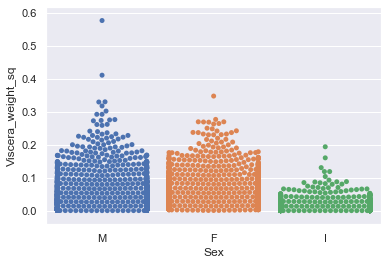

In [97]:
_= sns.swarmplot(x='Sex', y='Viscera_weight_sq', data=raw1)

In [98]:
train_set, test_set = train_test_split(raw1, test_size=0.3, random_state = 42)

# prepare the training data
x_train = train_set.drop('Sex',axis = 1)
y_train = train_set[['Sex']]

x = pl.fit_transform(x_train)

ord_enc = OrdinalEncoder()
y = ord_enc.fit_transform(y_train)

In [99]:
# prepare the testing data

x_test = test_set.drop('Sex',axis = 1)
y_test = test_set[['Sex']]

x_t = pl.fit_transform(x_test)
y_t = ord_enc.fit_transform(y_test)

In [100]:
print("shape of x train:",x.shape)
print("shape of y train:",y.shape)
print("shape of x test:",x_t.shape)
print("shape of y test:",y_t.shape)

shape of x train: (2923, 13)
shape of y train: (2923, 1)
shape of x test: (1254, 13)
shape of y test: (1254, 1)


In [101]:
for clf in (log_clf, svm_clf, tree_clf,rnd_clf,voting_clf,ada_clf):
    
    clf.fit(x,y.ravel())
    y_pred = clf.predict(x_t)
    print(clf.__class__.__name__,": ",accuracy_score(y_t.ravel(),y_pred))
    print("Conf_mat:") 
    print(confusion_matrix(y_t, y_pred))
    print("")

/Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression :  0.5661881977671451
Conf_mat:
[[157  55 165]
 [ 30 334  55]
 [154  85 219]]

SVC :  0.5677830940988836
Conf_mat:
[[151  42 184]
 [ 28 326  65]
 [146  77 235]]

DecisionTreeClassifier :  0.43620414673046254
Conf_mat:
[[148  57 172]
 [ 65 185 169]
 [171  73 214]]

RandomForestClassifier :  0.5494417862838915
Conf_mat:
[[160  38 179]
 [ 44 308  67]
 [171  66 221]]



/Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier :  0.5629984051036683
Conf_mat:
[[186  43 148]
 [ 44 333  42]
 [190  81 187]]

AdaBoostClassifier :  0.5717703349282297
Conf_mat:
[[110  51 216]
 [ 19 321  79]
 [ 98  74 286]]



In [102]:
for name,score in zip(x_train.columns, ada_clf.feature_importances_):
    print(name,':',score)

Length : 0.042
Diameter : 0.058
Height : 0.048
Whole weight : 0.046
Shucked weight : 0.04
Viscera weight : 0.042
Shell weight : 0.03
Rings : 0.064
Age : 0.06
Rings_per_length : 0.138
Weight_lost : 0.124
Weight_per_length : 0.278
Viscera_weight_sq : 0.03


> **OBSERVATIONS:**
1. Better than chance predictions (33%)
2. From the confusion matrix it is evident that classifiers are good at I but confuse M and F.
3. More improvement could be done by removing some outliers
4. Plotting the decision boundaries for these classifiers might provide a better picture
5. Some feature engineering to enforce better segregation

## Neural Network Implementation

In [26]:
import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

In [32]:
val, test = train_test_split(test_set, test_size=0.5, random_state = 42)

In [35]:
# prepare the val and test  data

x_val = pl.fit_transform(val.drop('Sex',axis = 1))
y_val = ord_enc.fit_transform(val[['Sex']])

x_test = pl.fit_transform(test.drop('Sex',axis = 1))
y_test = ord_enc.fit_transform(test[['Sex']])


In [29]:
# neural network

model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(x.shape[1],)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(x,to_categorical(y.ravel()),epochs=20,batch_size=500, validation_data=(x_val, to_categorical(y_val.ravel())))

Train on 2923 samples, validate on 627 samples
Epoch 1/20
2923/2923 [==============================] - 0s 155us/step - loss: 1.0162 - accuracy: 0.5142 - val_loss: 0.9574 - val_accuracy: 0.5678
Epoch 2/20
2923/2923 [==============================] - 0s 8us/step - loss: 0.9612 - accuracy: 0.5282 - val_loss: 0.9191 - val_accuracy: 0.5566
Epoch 3/20
2923/2923 [==============================] - 0s 9us/step - loss: 0.9329 - accuracy: 0.5310 - val_loss: 0.8907 - val_accuracy: 0.5550
Epoch 4/20
2923/2923 [==============================] - 0s 9us/step - loss: 0.9135 - accuracy: 0.5299 - val_loss: 0.8711 - val_accuracy: 0.5630
Epoch 5/20
2923/2923 [==============================] - 0s 9us/step - loss: 0.8991 - accuracy: 0.5262 - val_loss: 0.8582 - val_accuracy: 0.5630
Epoch 6/20
2923/2923 [==============================] - 0s 9us/step - loss: 0.8899 - accuracy: 0.5241 - val_loss: 0.8505 - val_accuracy: 0.5566
Epoch 7/20
2923/2923 [==============================] - 0s 8us/step - loss: 0.8835 - ac

In [41]:
to_categorical(y_val.ravel())

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

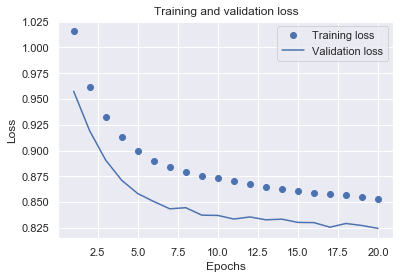

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

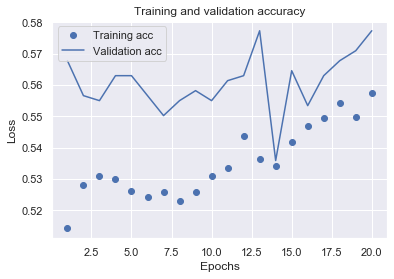

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model.evaluate(x_test, to_categorical(y_test.ravel()))

627/627 [==============================] - 0s 29us/step


[0.8541306573808478, 0.5358851552009583]

> ACCURACY OF 53.5 % ! 

In [47]:
# more hidden units!

model1 = models.Sequential()
model1.add(layers.Dense(64,activation='relu', input_shape=(x.shape[1],)))
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(3,activation='softmax'))

model1.summary()

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x,to_categorical(y.ravel()),epochs=20,batch_size=500, validation_data=(x_val, to_categorical(y_val.ravel())))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________
Train on 2923 samples, validate on 627 samples
Epoch 1/20
2923/2923 [==============================] - 0s 8us/step - loss: 0.8517 - accuracy: 0.5539 - val_loss: 0.8278 - val_accuracy: 0.5646
Epoch 2/20
2923/2923 [==============================] - 0s 9us/step - loss: 0.8512 - accuracy: 0.5529 - val_loss: 0.8318 - val_accuracy: 0.5614
Epoch 3/20
2923/2923 [=========================

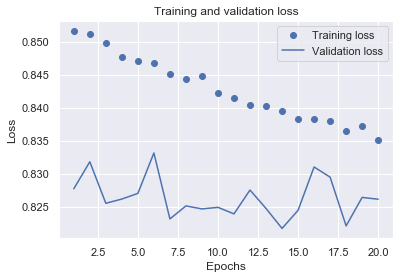

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

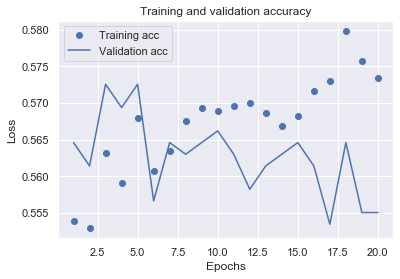

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Surprisingly, the neural network appears to have similar accuracy around 53% and it appears that the increased layers lead to overfitting. So this is the accuracy that is possible at the most! 

## A quick google search provides the answer as to segragating the abalones as per gender is done by some colour of the meat!